## Landslide Susceptibility Modeling Using Supervised Learning Technique

                                    Gazali Agboola
                    CSE 805 Machine Learning And Data Mining Project

# Contents
* Abstract
* Introduction
* Data Preprocessing
* Feature Engineering
* Model Building

# Abstract

Landslides are common natural hazards that pose a significant threat to humans and the environment globally. Landslides are mass movements of rock, soil, and debris down slopes caused by gravitational forces. Multiple natural or human factors such as heavy rainfall, land use, plant index, earthquakes, and volcanic activities cause landslides. Before determining the landslide risk assessment methods, several influencing factors and a map of the known landslides should be developed. This is because it is assumed that conditions that led to previous landslides are more likely to cause a new landslide.
Machine learning methods can assist in further understanding the significant factors controlling the occurrence of landslides, and to remotely monitor other landslides, we can use the historical dataset to build algorithms that can forecast the occurrence and extent of future landslide and slope failure. 
In this project, we will use a dataset from Kaggle to select the major factors controlling landslide occurrence using features selection and we will also build a supervised learning classification model that can predict if an area is prone to landslides or not. 


# Data description

Database Title: Landslide Prediction for Muzaffarabad-Pakistan

Number of Instances: 1216

Number of Attributes: 13

The class of Landslide is divided into 0 for non-landslide and 1 for landslide

The Class of the dataset is binary i.e. (0 for no landslide or 1 for landslide



# Data Preprocessing

In [782]:
#IMPORTING LIBRARY
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
import numpy as np
import missingno as msno
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import random
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [783]:
#importing the dataset 
data = pd.read_csv("Landslide_dataset.csv")

In [784]:
#printing the datashape
data.shape



(1216, 14)

In [785]:
print(data.describe())

         Landslide       Aspect    Curvature   Earthquake    Elevation  \
count  1216.000000  1216.000000  1216.000000  1216.000000  1216.000000   
mean      0.500000     2.961349     2.975329     2.103618     2.436678   
std       0.500206     1.148692     1.098918     0.669712     1.242301   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       0.000000     2.000000     2.000000     2.000000     1.000000   
50%       0.500000     3.000000     3.000000     2.000000     2.000000   
75%       1.000000     4.000000     4.000000     3.000000     3.000000   
max       1.000000     5.000000     5.000000     3.000000     5.000000   

              Flow    Lithology          NDVI         NDWI         Plan  \
count  1216.000000  1216.000000   1216.000000  1216.000000  1216.000000   
mean      2.338816     1.946546    167.507401     2.775493     3.055921   
std       1.112742     1.422779   4053.702639     1.300114     1.057288   
min       1.000000     1.000000  

In [786]:
data.head(10)

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,Decision
0,0,3,3,2,2,2,1,4,2,2,3,3,2,No
1,0,1,5,2,3,1,1,4,2,5,5,2,2,No
2,0,3,4,3,2,2,4,3,2,4,5,2,2,No
3,0,1,3,3,3,5,1,2,4,3,5,3,3,No
4,0,5,4,2,1,4,1,2,4,3,3,1,4,No
5,0,5,5,2,2,3,1,2,4,5,3,2,2,No
6,0,1,3,2,2,4,1,3,4,3,5,3,2,No
7,0,3,5,3,4,2,2,3,3,5,5,2,4,No
8,0,3,2,3,3,2,6,4,2,2,5,4,4,No
9,0,1,4,3,2,4,1,2,4,4,5,2,4,No


In [787]:
#The data is balanced. There are 608 Landslide and 608 non landslide
data['Landslide'].value_counts()

0    608
1    608
Name: Landslide, dtype: int64

In [788]:
#Checking for missing data as "9999"

(data == 99999).sum()



Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             2
NDWI             0
Plan             0
Precipitation    0
Profile          0
Slope            0
Decision         0
dtype: int64

In [789]:
missing_index = data.loc[(data.values == 99999).any(axis = 1)]. index.tolist()
print("The indices of the rows of missing value as ? is : ",(missing_index))

The indices of the rows of missing value as ? is :  [800, 801]


In [790]:
#Dropping the rolls with missing data
data2 = data.replace(99999, np.NaN)

In [791]:
landslide_data = data2.dropna()

In [792]:
landslide_data.shape

(1214, 14)

In [793]:
#Dropping the attribute decision as it has no impact on the model
landslide_dataset = landslide_data.drop(["Decision"], axis =1)
landslide_dataset.shape

(1214, 13)

In [794]:
#Descriptive statistics
print(landslide_dataset.describe())


         Landslide       Aspect    Curvature   Earthquake    Elevation  \
count  1214.000000  1214.000000  1214.000000  1214.000000  1214.000000   
mean      0.499176     2.962109     2.976112     2.102965     2.437397   
std       0.500205     1.149306     1.099467     0.669762     1.242535   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       0.000000     2.000000     2.000000     2.000000     1.000000   
50%       0.000000     3.000000     3.000000     2.000000     2.000000   
75%       1.000000     4.000000     4.000000     3.000000     3.000000   
max       1.000000     5.000000     5.000000     3.000000     5.000000   

              Flow    Lithology         NDVI         NDWI         Plan  \
count  1214.000000  1214.000000  1214.000000  1214.000000  1214.000000   
mean      2.340198     1.948105     3.040362     2.776771     3.057661   
std       1.112952     1.423432     1.239971     1.300804     1.057289   
min       1.000000     1.000000     1

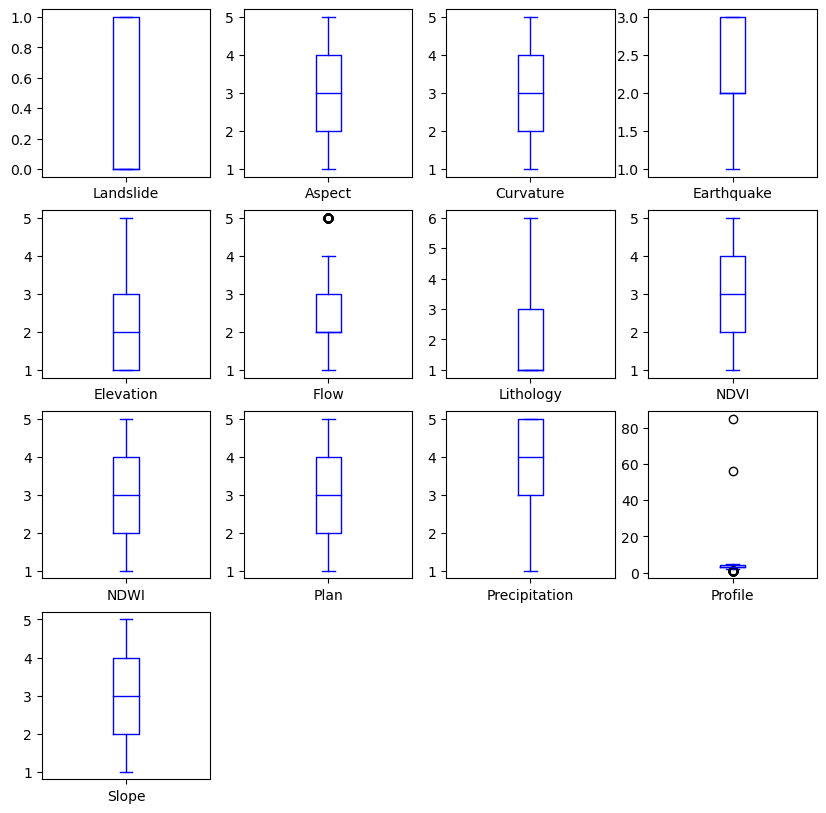

In [795]:
#Box plots to check for outliers in the dataset
landslide_dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, 
                      figsize = (10, 10), color = "blue")
plt.show()

In [796]:
df = pd.DataFrame(landslide_dataset)

In [797]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 1215
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Landslide      1214 non-null   int64  
 1   Aspect         1214 non-null   int64  
 2   Curvature      1214 non-null   int64  
 3   Earthquake     1214 non-null   int64  
 4   Elevation      1214 non-null   int64  
 5   Flow           1214 non-null   int64  
 6   Lithology      1214 non-null   int64  
 7   NDVI           1214 non-null   float64
 8   NDWI           1214 non-null   int64  
 9   Plan           1214 non-null   int64  
 10  Precipitation  1214 non-null   int64  
 11  Profile        1214 non-null   int64  
 12  Slope          1214 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 132.8 KB


In [798]:
#Identifying where there is any outlier
from scipy import stats
threshold = 3 
z = np.abs(stats.zscore(df))
outlier_indices = (z > threshold)

In [799]:
print((outlier_indices).sum())

Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             0
NDWI             0
Plan             0
Precipitation    0
Profile          2
Slope            0
dtype: int64


In [800]:
#Removing outliers to ensure the data is cleaned

indices = outlier_indices.loc[(outlier_indices.values == True).any(axis = 1)].index.tolist()
df2 =df.drop(indices)

In [801]:
df2.shape

(1212, 13)

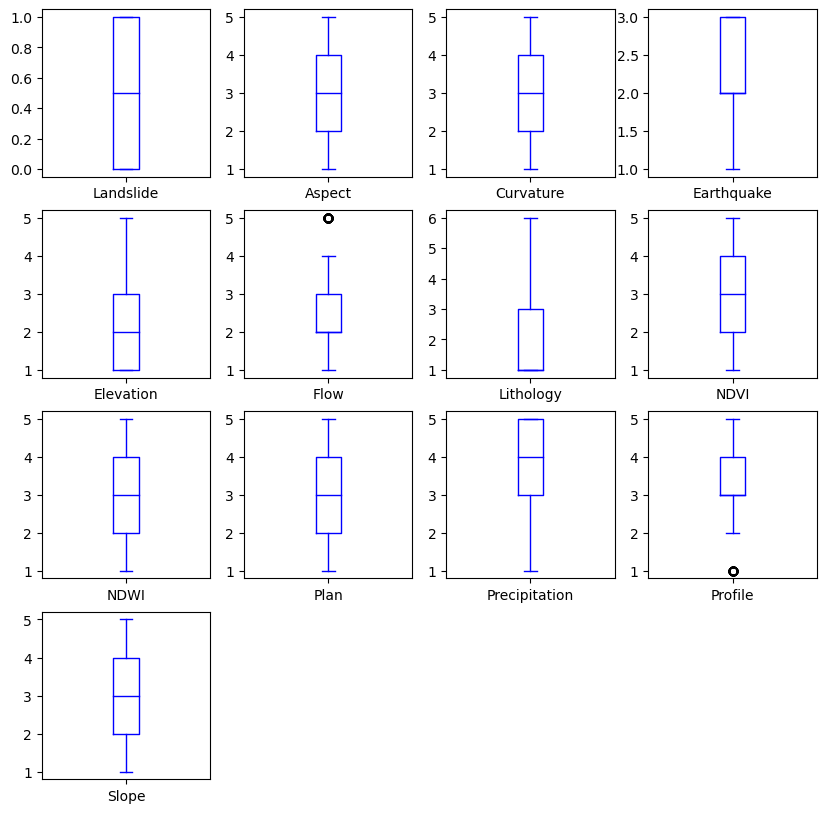

In [802]:
#Box plots to check for outliers if it has been removed
df2.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, 
                      figsize = (10, 10), color = "blue")
plt.show()

#The boxplot improved after removing outliers

Landslide
0    50.0
1    50.0
Name: Landslide, dtype: float64


<AxesSubplot:ylabel='Landslide'>

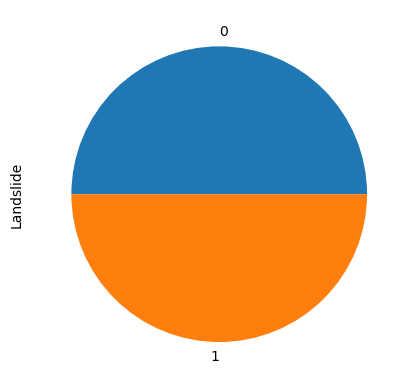

In [803]:
# Checking the class distribution of the target variable in percentage
print((df2.groupby('Landslide')['Landslide'].count()/df2['Landslide'].count()) *100)
((df2.groupby('Landslide')['Landslide'].count()/df2['Landslide'].count()) *100).plot.pie()

In [804]:
# Checking the correlation between the features
corr = df2.corr()
corr

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
Landslide,1.000000,-0.008633,-0.173393,0.187313,-0.168049,-0.261124,-0.120538,0.111900,-0.194317,-0.103052,0.280490,0.169928,0.123029
Aspect,-0.008633,1.000000,-0.024232,0.014727,0.017998,0.024295,0.025086,-0.158561,0.168099,-0.043066,-0.010454,-0.015876,0.048420
Curvature,-0.173393,-0.024232,1.000000,-0.049595,0.193843,0.025736,0.058319,0.094625,-0.089028,0.815075,-0.104207,-0.806851,0.143316
Earthquake,0.187313,0.014727,-0.049595,1.000000,0.071308,0.003382,0.095507,-0.134619,0.118588,-0.022582,0.825169,0.049177,0.055050
Elevation,-0.168049,0.017998,0.193843,0.071308,1.000000,0.026903,0.429702,-0.217003,0.187921,0.104691,-0.003628,-0.228721,0.333029
Flow,-0.261124,0.024295,0.025736,0.003382,0.026903,1.000000,-0.033881,-0.393805,0.462291,0.041163,0.002451,-0.011119,-0.078842
Lithology,-0.120538,0.025086,0.058319,0.095507,0.429702,-0.033881,1.000000,-0.129279,0.119080,0.008051,0.005351,-0.048930,0.169103
NDVI,0.111900,-0.158561,0.094625,-0.134619,-0.217003,-0.393805,-0.129279,1.000000,-0.931590,0.102043,-0.096063,-0.042720,0.041726
NDWI,-0.194317,0.168099,-0.089028,0.118588,0.187921,0.462291,0.119080,-0.931590,1.000000,-0.097774,0.078201,0.040269,-0.098171
Plan,-0.103052,-0.043066,0.815075,-0.022582,0.104691,0.041163,0.008051,0.102043,-0.097774,1.000000,-0.072768,-0.487539,0.055292


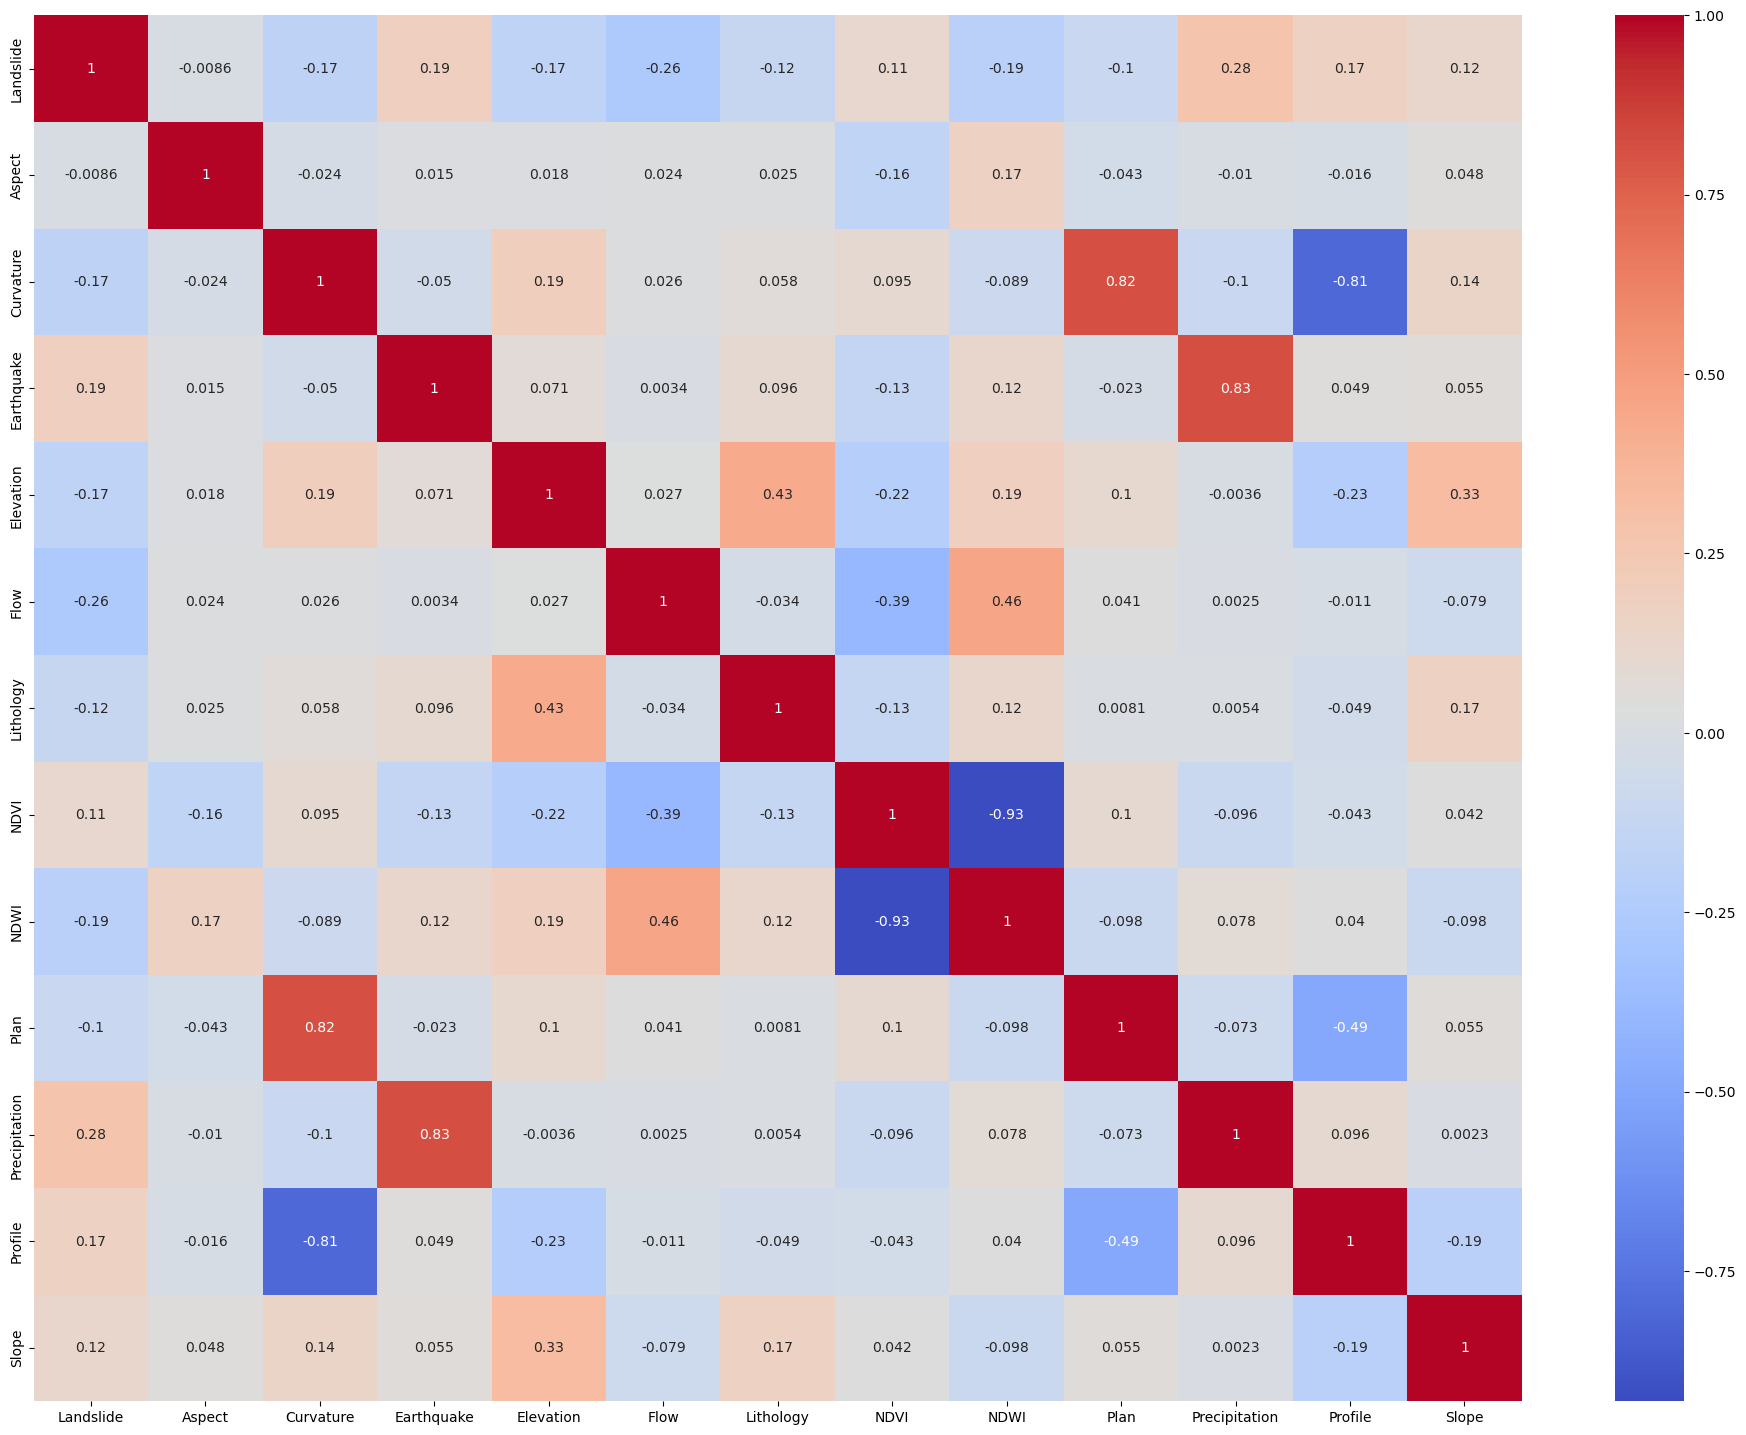

In [805]:
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [806]:
df2.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.500000,2.962046,2.977723,2.102310,2.436469,2.338284,1.948845,3.042904,2.773927,3.059406,3.813531,3.262376,2.811881
std,0.500206,1.147378,1.099658,0.669812,1.242686,1.112686,1.424345,1.239246,1.299830,1.057287,1.347799,1.039502,1.194229
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,0.500000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [807]:
# Splitting the dataset into X and y
y= df2['Landslide']
X = df2.drop(['Landslide'], axis=1)

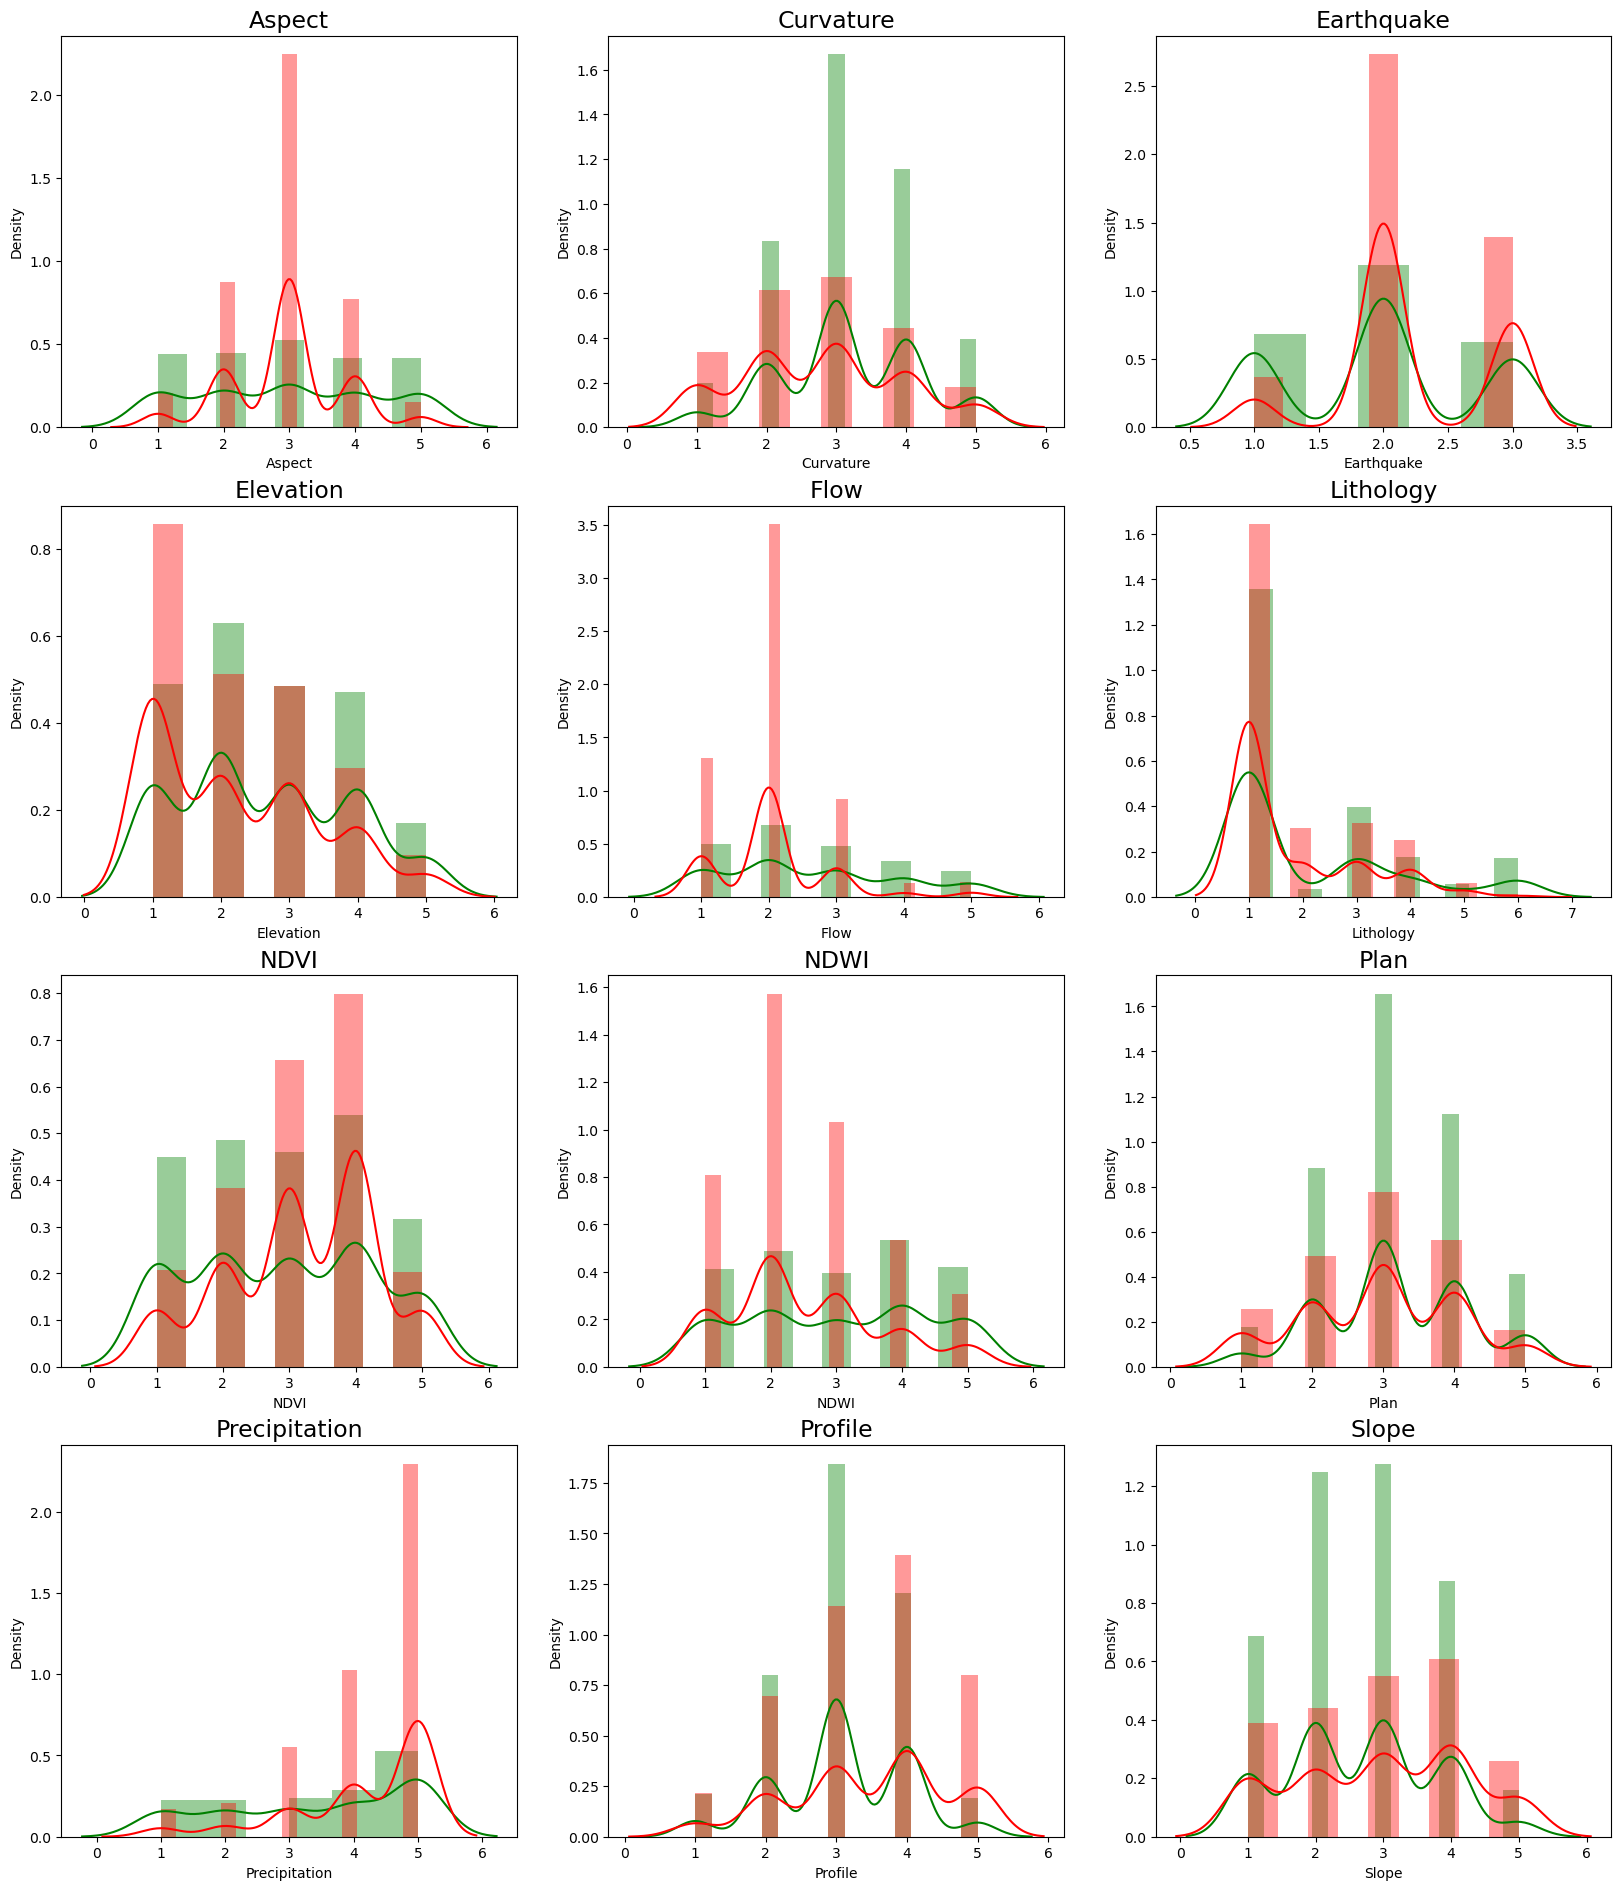

In [808]:
# plotting the histogram of each attribute from the dataset to see the skewness
# Accumulating all the column names under one variable
import warnings
warnings.filterwarnings('ignore')

cols = list(X.columns.values)
Landslide = data.Landslide == 1
Non_Landslide = data.Landslide == 0

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][Non_Landslide], color='green')
  sns.distplot(X[col][Landslide], color='red')
  plt.title(col, fontsize=17)
plt.show()

# Feature Engineering

Selecting the best features.
We will use the univariate statistical test(Chi-squared for classification) to select the best 4 attributes for our model

Based on the below selection 1. Elevation, Flow, NDWI and Precipitation are the top 4 features for our model

In [809]:
#Best Features Top 4
#Feature extraction using univariate statistical tests(Chi-squared for classification)
# Splitting the dataset into X and y
#y= df2['Landslide'], Already defined 
#X = df2.drop(['Landslide'], axis=1), Already Defined
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:10,:])

[4.011e-02 1.479e+01 9.068e+00 2.168e+01 4.372e+01 1.832e+01 7.653e+00
 2.785e+01 4.699e+00 4.538e+01 1.158e+01 9.297e+00]
[[2. 2. 2. 3.]
 [3. 1. 2. 5.]
 [2. 2. 2. 5.]
 [3. 5. 4. 5.]
 [1. 4. 4. 3.]
 [2. 3. 4. 3.]
 [2. 4. 4. 5.]
 [4. 2. 3. 5.]
 [3. 2. 2. 5.]
 [2. 4. 4. 5.]]


In [810]:
# the top 4 features are elevation, Flow, NDWI and Precipitation

>1 0.570 (0.046)
>2 0.597 (0.051)
>3 0.643 (0.052)
>4 0.699 (0.033)
>5 0.697 (0.040)
>6 0.698 (0.033)
>7 0.702 (0.032)
>8 0.733 (0.031)
>9 0.732 (0.048)
>10 0.732 (0.039)
>11 0.738 (0.033)
>12 0.737 (0.043)


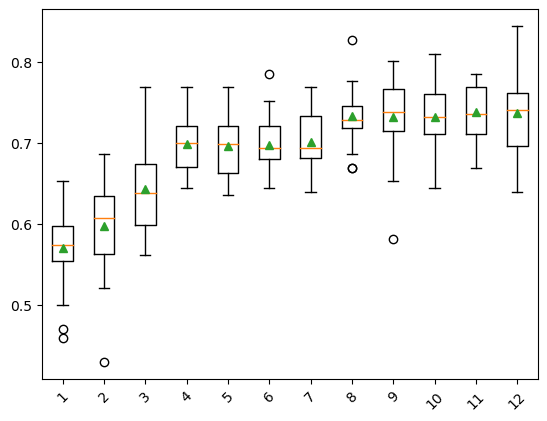

In [811]:
from pandas import plotting
# comparing PCA number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt



#Train Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)  

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,13):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X1, y1):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X1, y1 = X_train, Y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X1, y1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

# Model Building

In [812]:
# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [813]:
# Splitting the dataset into X and y
y= df2['Landslide']
X = df2.drop(['Landslide'], axis=1)

In [814]:
# Split the dataset using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.20)

In [815]:
#Creating a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value'])

In [816]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [817]:
# # Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )

  searchCV_l1.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_)  


  #find predicted vallues
  y_pred_l1 = searchCV_l1.predict(X_test)
  y_pred_l2 = searchCV_l2.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
    
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))
  
  # kappa score
  cohen_kappa_score(y_test, y_pred_l2)
  print(f"Kappa Score = {cohen_kappa_score(y_test, y_pred_l2)}\n")
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
 
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [818]:
# Created a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with rbf kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='rbf', random_state=10)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))

  # Run classifier
  classifier = SVC(kernel='rbf' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
 
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [819]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results,Methodology, X_train,y_train, X_test, y_test ):

  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))
 
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [820]:
# Created a common function to fit and predict on a Random Forest model
def buildAndRunRandomForestModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  # Create the model with 50 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=10)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)
  
    
  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [821]:
#Performing RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=10)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   0    1    2 ... 1209 1210 1211] TEST: [   7   11   27   29   31   35   43   60   64   67   69   74   87  104
  120  123  131  139  142  145  151  174  188  190  203  218  222  225
  228  230  244  273  299  329  335  339  354  358  363  374  384  387
  392  410  413  418  428  437  448  450  461  463  483  484  507  520
  525  531  533  539  569  608  618  619  638  658  665  668  673  679
  685  695  699  709  718  720  731  742  748  754  768  776  788  792
  795  800  802  805  810  832  844  849  862  882  885  890  897  909
  943  960  967  975  994  995 1003 1009 1022 1024 1035 1044 1060 1079
 1082 1108 1109 1118 1130 1143 1160 1186 1206 1208]
TRAIN: [   0    1    2 ... 1209 1210 1211] TEST: [  16   20   22   24   41   48   52   56   80  102  109  121  124  125
  126  143  152  157  172  173  177  179  191  211  217  234  261  264
  274  278  305  307  323  326  334  345  366  369  385  399  414  421
  425  426  427  442  443  447  479  491  495  501  508  510  524  52

KNN Model
model score
0.7768595041322314
Confusion Matrix


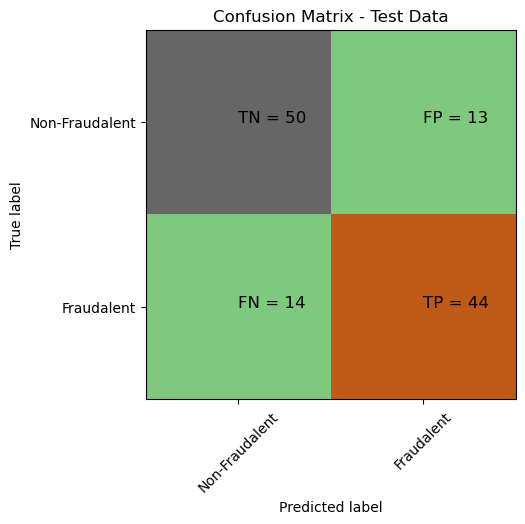

classification Report
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        63
           1       0.77      0.76      0.77        58

    accuracy                           0.78       121
   macro avg       0.78      0.78      0.78       121
weighted avg       0.78      0.78      0.78       121

KNN roc_value: 0.8407224958949095
KNN threshold: 0.6
ROC for the test dataset 84.1%


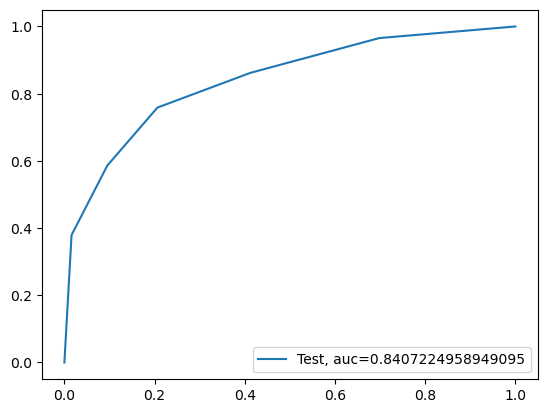

Time Taken by Model: --- 0.2801365852355957 seconds ---
------------------------------------------------------------


In [822]:
#Run KNN Model
import time
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

Random Forest Model
Model Accuracy: 0.8181818181818182
Confusion Matrix


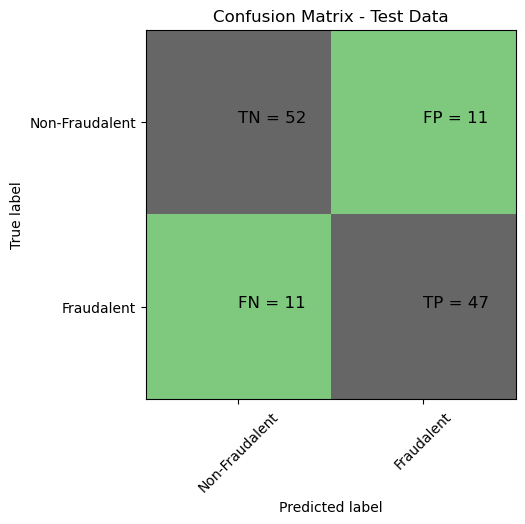

classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        63
           1       0.81      0.81      0.81        58

    accuracy                           0.82       121
   macro avg       0.82      0.82      0.82       121
weighted avg       0.82      0.82      0.82       121

Random Forest roc_value: 0.8635741652983032
Random Forest threshold: 0.55
ROC for the test dataset 86.4%


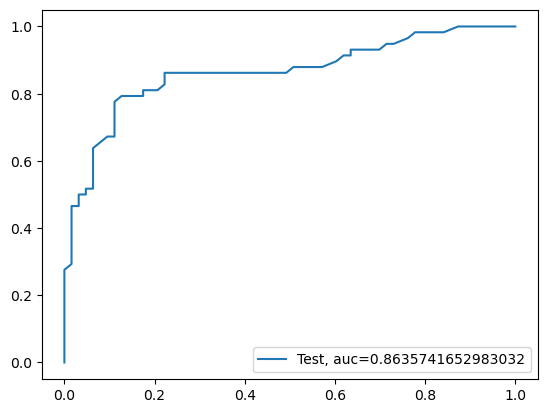

Time Taken by Model: --- 0.463702917098999 seconds ---
------------------------------------------------------------


In [823]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

SVM Model with rbf Kernel
accuracy_score : 0.7851239669421488
Confusion Matrix


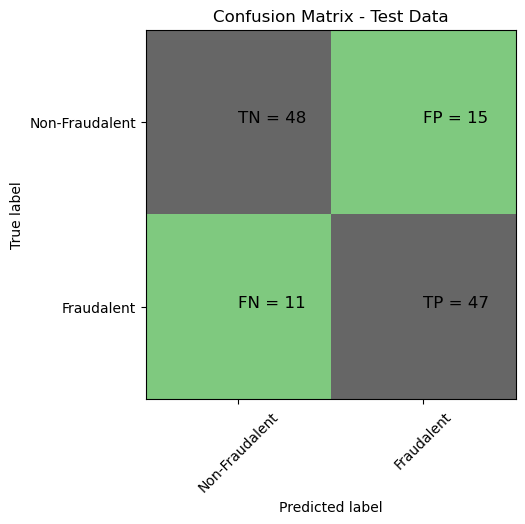

classification Report
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        63
           1       0.76      0.81      0.78        58

    accuracy                           0.79       121
   macro avg       0.79      0.79      0.79       121
weighted avg       0.79      0.79      0.79       121

SVM roc_value: 0.8371647509578544
SVM threshold: 0.6143081683897306
ROC for the test dataset 83.7%


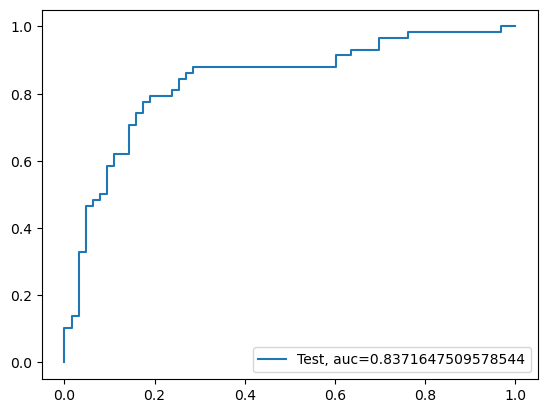

Time Taken by Model: --- 0.5280277729034424 seconds ---


In [824]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with rbf Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.7883477616498578
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0

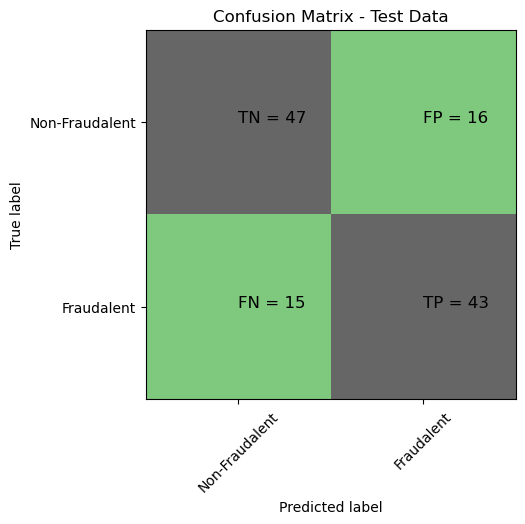

classification Report
              precision    recall  f1-score   support

           0       0.76      0.75      0.75        63
           1       0.73      0.74      0.74        58

    accuracy                           0.74       121
   macro avg       0.74      0.74      0.74       121
weighted avg       0.74      0.74      0.74       121

Accuarcy of Logistic model with l1 regularisation : 0.5206611570247934
Confusion Matrix


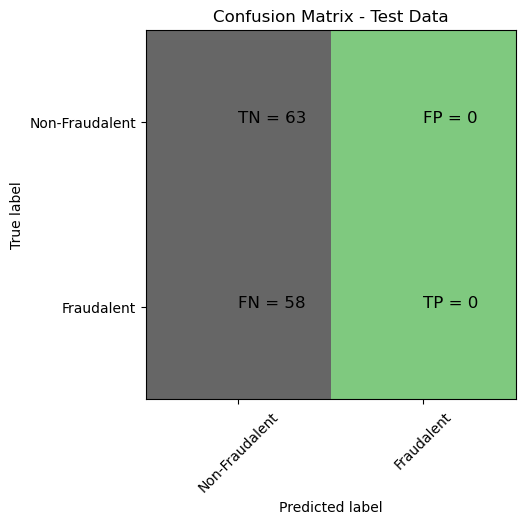

classification Report
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        63
           1       0.00      0.00      0.00        58

    accuracy                           0.52       121
   macro avg       0.26      0.50      0.34       121
weighted avg       0.27      0.52      0.36       121

l2 roc_value: 0.761631089217296
l2 threshold: 0.44507776629698925
Kappa Score = 0.48707780664569944

ROC for the test dataset 76.2%


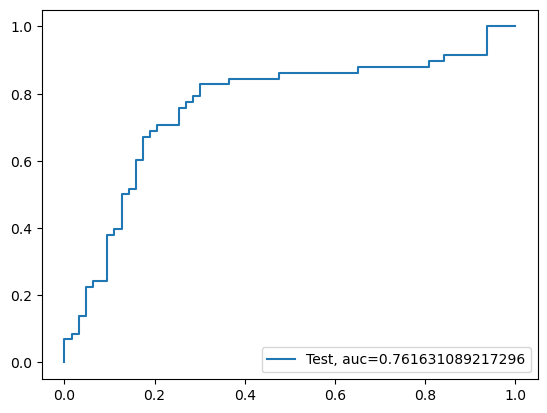

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


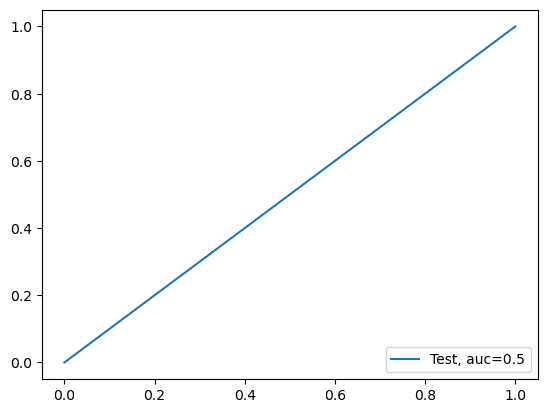

Time Taken by Model: --- 1.1337854862213135 seconds ---
------------------------------------------------------------


In [825]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

# NORMALIZATION

In [827]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
y= df2['Landslide']
X = df2.drop(['Landslide'], axis=1)
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(X)

In [828]:
#Performing RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv2, X_test_cv2 = rescaledX[train_index], rescaledX[test_index]
    y_train_cv2, y_test_cv2 = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   0    1    2 ... 1209 1210 1211] TEST: [  34   37   66   81   85   89  113  118  120  134  144  149  160  168
  174  184  194  213  217  219  239  240  267  277  282  289  293  294
  314  323  333  355  356  360  375  376  380  398  406  410  414  415
  423  426  432  435  441  453  456  470  472  492  505  513  515  518
  540  557  561  577  581  617  624  630  631  632  640  641  644  658
  659  665  698  714  734  737  743  751  779  788  803  808  818  823
  824  831  844  851  877  878  879  880  901  907  908  922  925  928
  936  951  952  955  963  965  977  981  994  997 1000 1013 1020 1021
 1069 1077 1078 1096 1105 1122 1133 1155 1175 1192]
TRAIN: [   0    1    2 ... 1209 1210 1211] TEST: [   7   12   16   25   43   46   70   75   82   90   94   99  108  136
  137  145  147  157  162  165  167  198  229  237  238  248  286  304
  309  316  317  325  330  345  357  378  385  389  393  404  420  424
  427  434  442  448  452  475  490  493  500  501  504  508  511  51

SVM Model with rbf Kernel
accuracy_score : 0.8181818181818182
Confusion Matrix


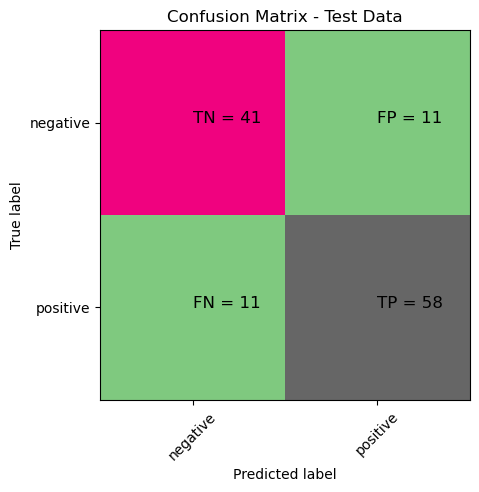

classification Report
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        52
           1       0.84      0.84      0.84        69

    accuracy                           0.82       121
   macro avg       0.81      0.81      0.81       121
weighted avg       0.82      0.82      0.82       121

SVM roc_value: 0.8837792642140468
SVM threshold: 0.4257491477951684
ROC for the test dataset 88.4%


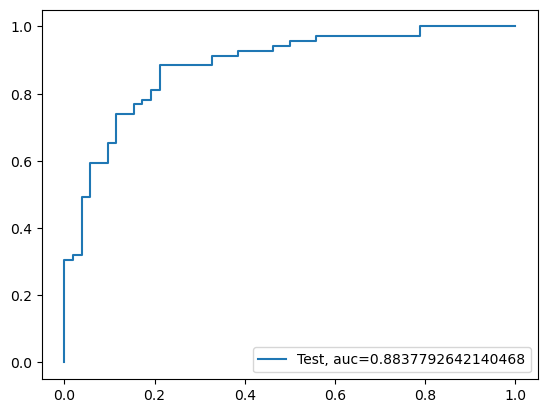

Time Taken by Model: --- 0.4955003261566162 seconds ---


In [829]:
#Run SVM Model with rbf Kernel
print("SVM Model with rbf Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation with normalization",X_train_cv2,y_train_cv2, X_test_cv2, y_test_cv2)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.8099173553719008
Confusion Matrix


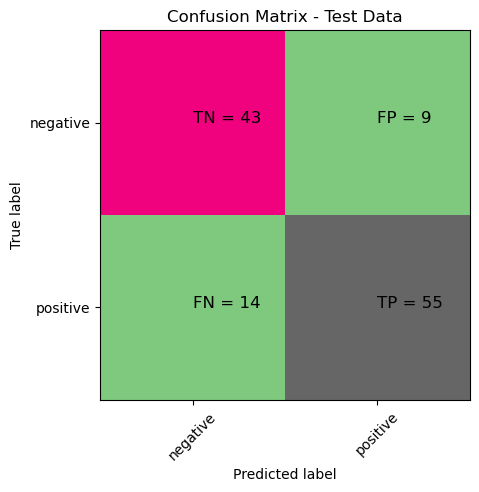

classification Report
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        52
           1       0.86      0.80      0.83        69

    accuracy                           0.81       121
   macro avg       0.81      0.81      0.81       121
weighted avg       0.81      0.81      0.81       121

Random Forest roc_value: 0.870540691192865
Random Forest threshold: 0.52
ROC for the test dataset 87.1%


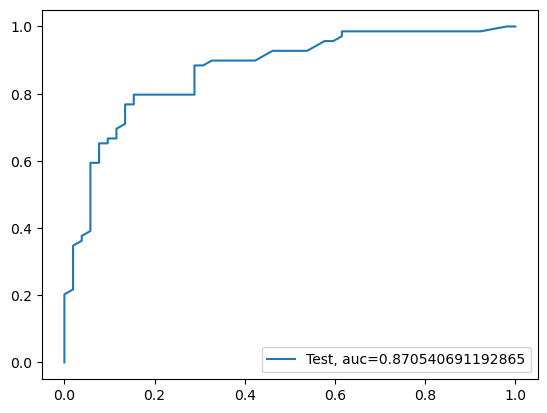

Time Taken by Model: --- 0.46500062942504883 seconds ---
------------------------------------------------------------


In [830]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation with normalization",X_train_cv2,y_train_cv2, X_test_cv2, y_test_cv2)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.7767612244302268
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0

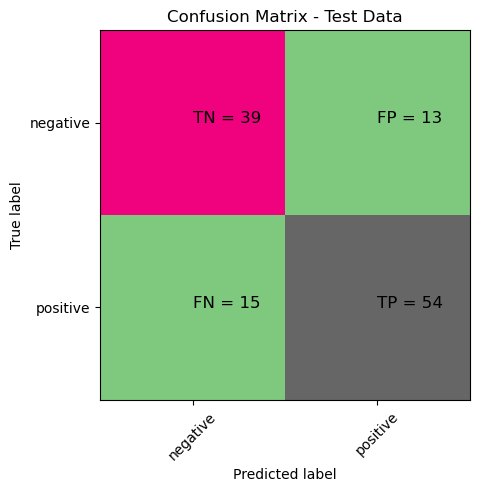

classification Report
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        52
           1       0.81      0.78      0.79        69

    accuracy                           0.77       121
   macro avg       0.76      0.77      0.76       121
weighted avg       0.77      0.77      0.77       121

Accuarcy of Logistic model with l1 regularisation : 0.4297520661157025
Confusion Matrix


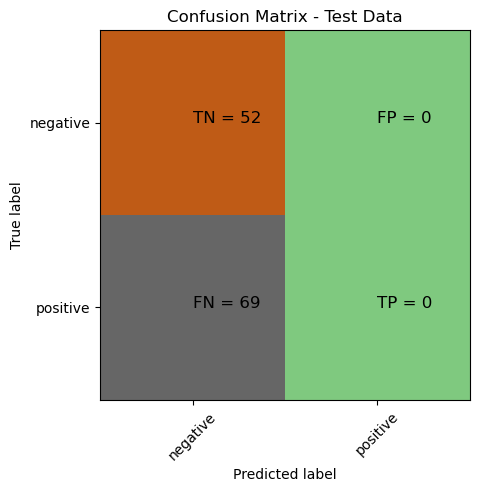

classification Report
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        52
           1       0.00      0.00      0.00        69

    accuracy                           0.43       121
   macro avg       0.21      0.50      0.30       121
weighted avg       0.18      0.43      0.26       121

l2 roc_value: 0.8099219620958751
l2 threshold: 0.4259389636991007
Kappa Score = 0.5300970873786408

ROC for the test dataset 81.0%


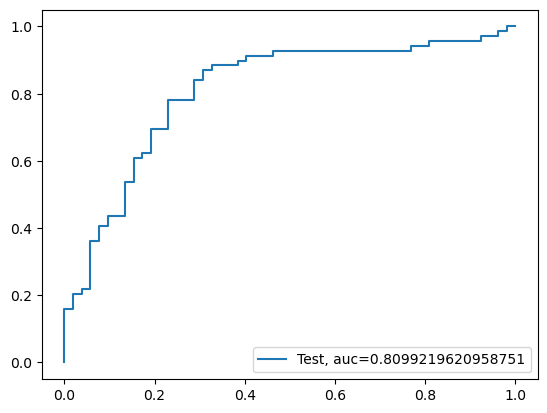

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


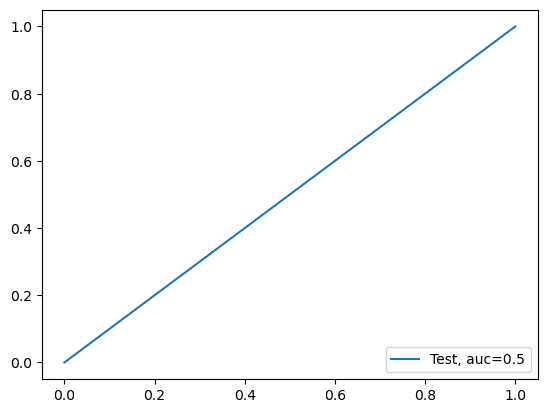

Time Taken by Model: --- 1.3220202922821045 seconds ---
------------------------------------------------------------


In [831]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation with normalization", X_train_cv2,y_train_cv2, X_test_cv2, y_test_cv2)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

KNN Model
model score
0.7768595041322314
Confusion Matrix


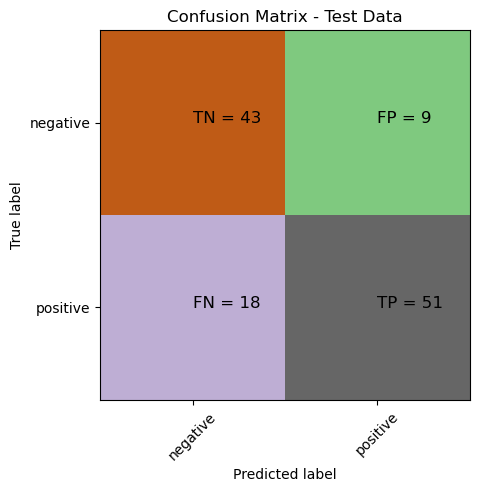

classification Report
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        52
           1       0.85      0.74      0.79        69

    accuracy                           0.78       121
   macro avg       0.78      0.78      0.78       121
weighted avg       0.79      0.78      0.78       121

KNN roc_value: 0.8114548494983277
KNN threshold: 0.6
ROC for the test dataset 81.1%


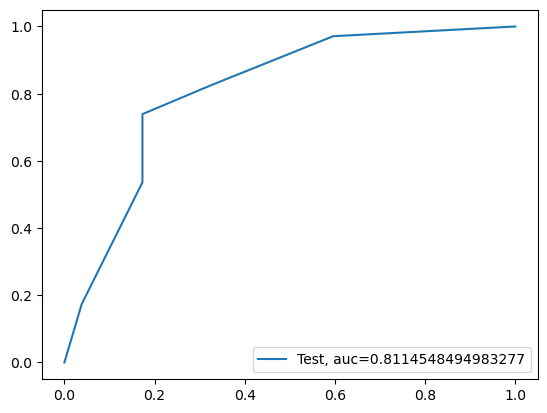

Time Taken by Model: --- 0.259441614151001 seconds ---
------------------------------------------------------------


In [832]:
#Run KNN Model
import time
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation with normalization",X_train_cv2,y_train_cv2, X_test_cv2, y_test_cv2)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

# Feature reduction 

In [833]:
# the top 4 features are elevation, Flow, NDWI and Precipitation

y= df2['Landslide']
X2 = df2[["Elevation", 'Flow', "NDWI", "Precipitation" ]]

In [834]:
X2.head

<bound method NDFrame.head of       Elevation  Flow  NDWI  Precipitation
0             2     2     2              3
1             3     1     2              5
2             2     2     2              5
3             3     5     4              5
4             1     4     4              3
...         ...   ...   ...            ...
1211          4     2     5              2
1212          5     3     5              2
1213          5     2     3              2
1214          3     1     1              1
1215          3     2     1              1

[1212 rows x 4 columns]>

In [835]:
#Performing RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=None)
# X2 is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv3, X_test_cv3 = X2.iloc[train_index], X2.iloc[test_index]
    y_train_cv3, y_test_cv3 = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   0    1    2 ... 1209 1210 1211] TEST: [  12   13   28   33   44   55   56   87  109  125  145  149  158  170
  180  209  210  221  223  227  232  245  256  261  263  281  323  330
  347  354  374  379  389  390  393  395  399  410  414  424  437  454
  459  461  466  473  488  490  496  497  512  523  536  539  555  561
  572  577  578  583  593  615  623  628  690  721  739  760  766  769
  774  781  784  811  818  821  828  833  835  845  864  868  872  883
  886  893  902  907  920  925  953  961  967  973 1003 1004 1007 1011
 1016 1044 1055 1056 1060 1065 1075 1096 1099 1105 1108 1109 1134 1136
 1142 1145 1159 1162 1165 1169 1175 1183 1193 1203]
TRAIN: [   0    2    3 ... 1209 1210 1211] TEST: [   1   29   42   46   62   66   92   98   99  120  121  123  134  141
  155  156  165  172  173  175  178  185  188  189  194  201  211  212
  218  246  262  265  273  282  287  300  305  306  314  341  343  353
  356  358  361  366  372  382  387  392  433  442  445  463  480  48

SVM Model with rbf Kernel
accuracy_score : 0.6859504132231405
Confusion Matrix


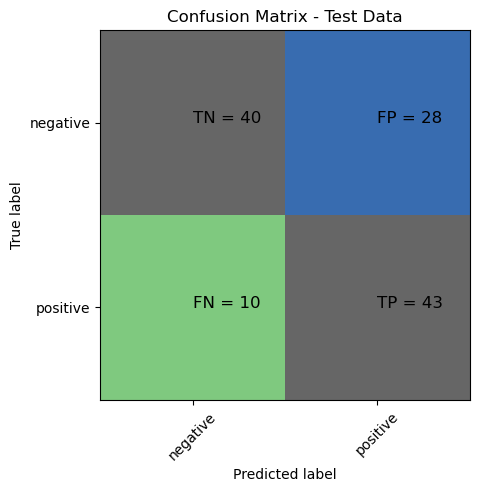

classification Report
              precision    recall  f1-score   support

           0       0.80      0.59      0.68        68
           1       0.61      0.81      0.69        53

    accuracy                           0.69       121
   macro avg       0.70      0.70      0.69       121
weighted avg       0.71      0.69      0.68       121

SVM roc_value: 0.7487513873473919
SVM threshold: 0.5784394998334444
ROC for the test dataset 74.9%


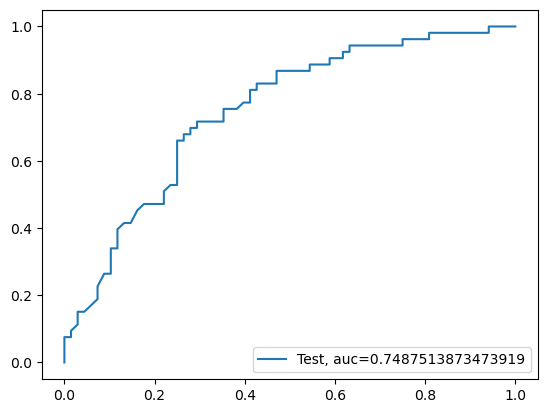

Time Taken by Model: --- 0.5110487937927246 seconds ---


In [836]:
#Run SVM Model with rbf Kernel
print("SVM Model with rbf Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation with top 4",X_train_cv3,y_train_cv3, X_test_cv3, y_test_cv3)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.6942148760330579
Confusion Matrix


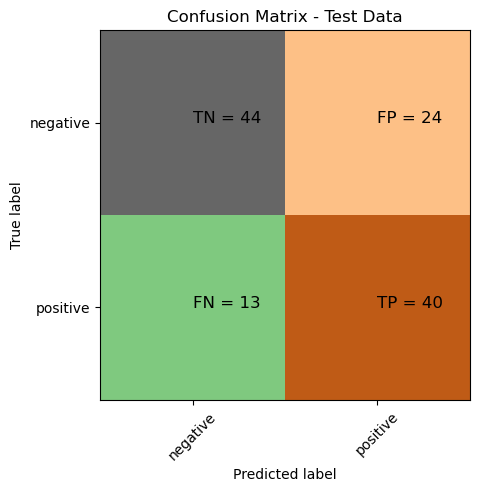

classification Report
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        68
           1       0.62      0.75      0.68        53

    accuracy                           0.69       121
   macro avg       0.70      0.70      0.69       121
weighted avg       0.71      0.69      0.70       121

Random Forest roc_value: 0.7434794672586016
Random Forest threshold: 0.4895000000000001
ROC for the test dataset 74.3%


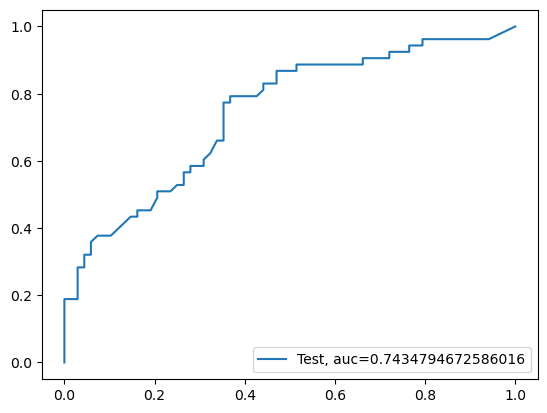

Time Taken by Model: --- 0.44431471824645996 seconds ---
------------------------------------------------------------


In [837]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation with top 4",X_train_cv3,y_train_cv3, X_test_cv3, y_test_cv3)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.7659157085051095
Parameters for l1 regularisations
[[0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0

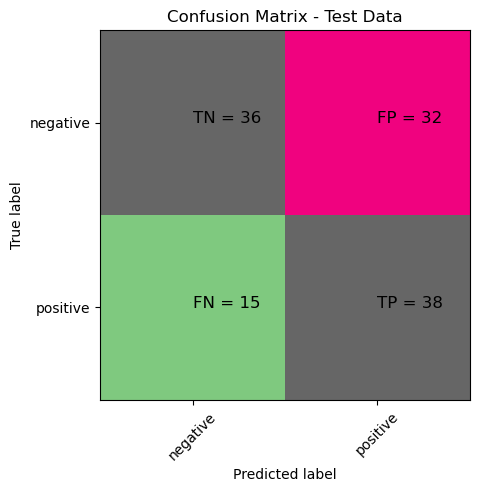

classification Report
              precision    recall  f1-score   support

           0       0.71      0.53      0.61        68
           1       0.54      0.72      0.62        53

    accuracy                           0.61       121
   macro avg       0.62      0.62      0.61       121
weighted avg       0.63      0.61      0.61       121

Accuarcy of Logistic model with l1 regularisation : 0.5619834710743802
Confusion Matrix


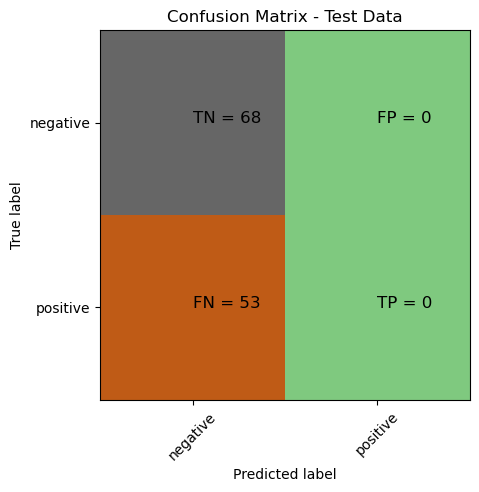

classification Report
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        68
           1       0.00      0.00      0.00        53

    accuracy                           0.56       121
   macro avg       0.28      0.50      0.36       121
weighted avg       0.32      0.56      0.40       121

l2 roc_value: 0.7090732519422863
l2 threshold: 0.5586768376051399
Kappa Score = 0.23797400509178612

ROC for the test dataset 70.9%


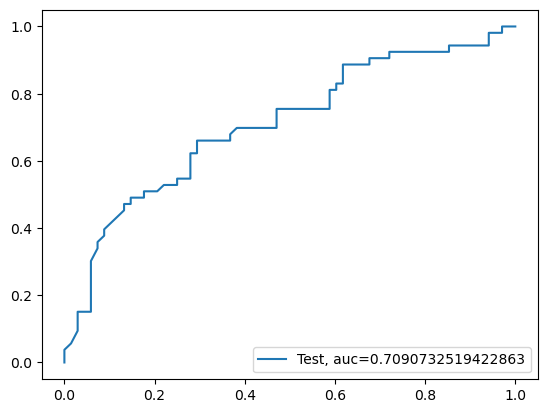

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


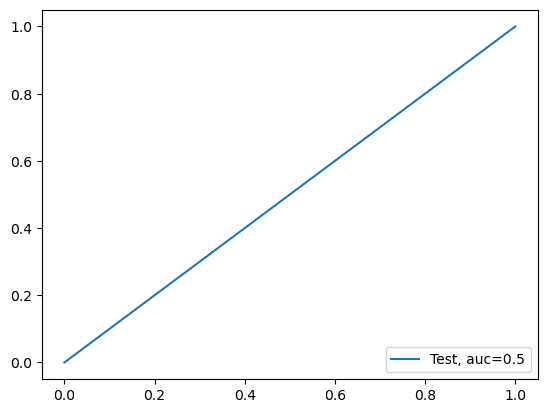

Time Taken by Model: --- 1.0382592678070068 seconds ---
------------------------------------------------------------


In [838]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation with top 4", X_train_cv3,y_train_cv3, X_test_cv3, y_test_cv3)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

KNN Model
model score
0.6198347107438017
Confusion Matrix


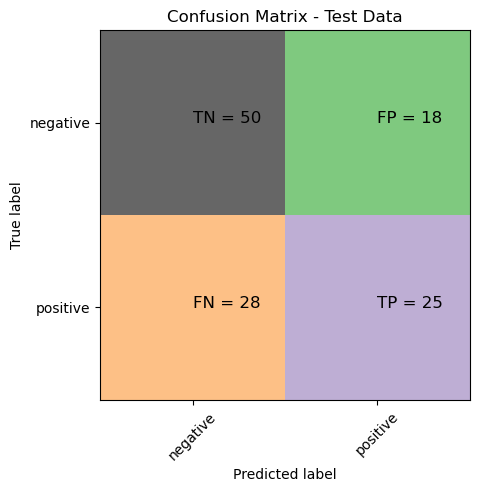

classification Report
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        68
           1       0.58      0.47      0.52        53

    accuracy                           0.62       121
   macro avg       0.61      0.60      0.60       121
weighted avg       0.61      0.62      0.61       121

KNN roc_value: 0.7179522752497225
KNN threshold: 0.4
ROC for the test dataset 71.8%


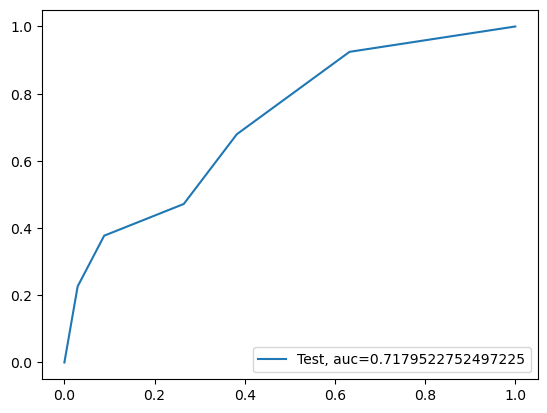

Time Taken by Model: --- 0.23321795463562012 seconds ---
------------------------------------------------------------


In [839]:
#Run KNN Model
import time
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation with top 4",X_train_cv3,y_train_cv3, X_test_cv3, y_test_cv3)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [840]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,KNN,0.776860,0.840722,0.600000
1,RepeatedKFold Cross Validation,Random Forest,0.818182,0.863574,0.550000
2,RepeatedKFold Cross Validation,SVM,0.785124,0.837165,0.614308
3,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.743802,0.761631,0.445078
4,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.520661,0.500000,1.500000
5,RepeatedKFold Cross Validation with normalization,SVM,0.818182,0.883779,0.425749
6,RepeatedKFold Cross Validation with normalization,Random Forest,0.809917,0.870541,0.520000
7,RepeatedKFold Cross Validation with normalization,Logistic Regression with L2 Regularisation,0.768595,0.809922,0.425939
8,RepeatedKFold Cross Validation with normalization,Logistic Regression with L1 Regularisation,0.429752,0.500000,1.500000
9,RepeatedKFold Cross Validation with normalization,KNN,0.776860,0.811455,0.600000
